In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [8]:
# Read image using mpimg
# As we used the matplotlib.image.imread---> so no need to convert the image into rgb
image = mpimg.imread('images/car_green_screen.jpg')

# Dimensions of the image
print("Dimenions of the image is (HxBxC): ", image.shape)

Dimenions of the image is (HxBxC):  (450, 660, 3)


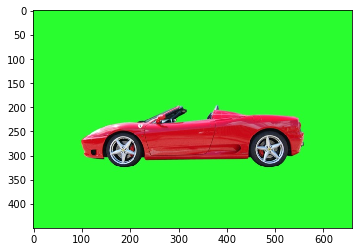

In [17]:
plt.imshow(image)

# Threshold upper and lower limit for masking

In [30]:
lower_val = np.array([0,180,0])
upper_val = np.array([80,255,100])

# Masking of the image--> In grayScale

In [31]:
image_copy = np.copy(image)

# This mask will be used to select the area, where addition and deletion will be done
# why it is imp: bcz it has converted whole image only into 2 pixel value (i.e 0 and 255)
mask = cv2.inRange(image_copy, lower_val, upper_val)

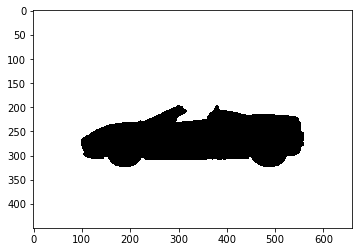

In [32]:
plt.imshow(mask,cmap='gray')  #cmap ='gray' is important otherwise it will show colored version 

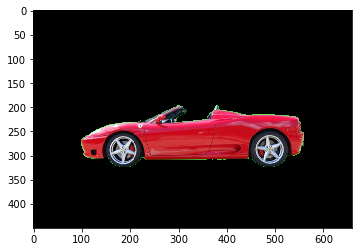

In [33]:
masked_image = np.copy(image_copy)

masked_image [mask !=0]=[0,0,0]

plt.imshow(masked_image)

# Background Image Preparation

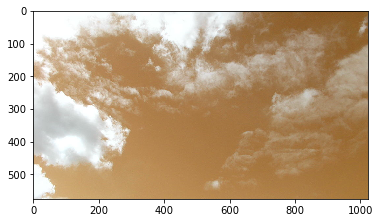

In [49]:
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
plt.imshow(background_image)

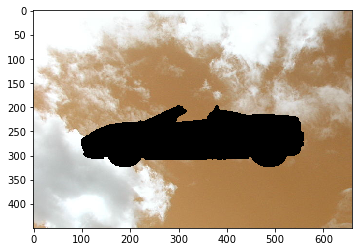

In [50]:
#crop it to the right size(as per the input image)
crop_background = background_image[0:450, 0:660]

# Mask the cropped background so that car area is blocked
crop_background [mask == 0] = [0,0,0]

plt.imshow(crop_background)

# New Picture

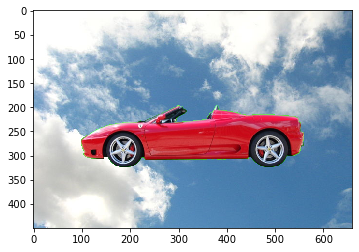

In [54]:
bgr_crop_background = cv2.cvtColor(crop_background,cv2.COLOR_RGB2BGR)

new_picture = masked_image + bgr_crop_background
plt.imshow(new_picture)